<a href="https://colab.research.google.com/github/rajatjpatel/Bazaar/blob/main/predictionsSV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Import the python lib
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [4]:
#load Data from Google
from google.colab import files 
files.upload()

Saving AMZN.csv to AMZN.csv


{'AMZN.csv': b'Date,Open,High,Low,Close,Adj Close,Volume\n2020-09-09,3202.989990,3303.179932,3185.000000,3268.610107,3268.610107,5188700\n2020-09-10,3307.219971,3349.889893,3170.550049,3175.110107,3175.110107,5330700\n2020-09-11,3208.689941,3217.340088,3083.979980,3116.219971,3116.219971,5094000\n2020-09-14,3172.939941,3187.389893,3096.000000,3102.969971,3102.969971,4529600\n2020-09-15,3136.159912,3175.020020,3108.919922,3156.129883,3156.129883,4021500\n2020-09-16,3179.989990,3187.239990,3074.149902,3078.100098,3078.100098,4512200\n2020-09-17,3009.250000,3029.429932,2972.550049,3008.729980,3008.729980,6449100\n2020-09-18,3031.739990,3037.800049,2905.540039,2954.909912,2954.909912,8892600\n2020-09-21,2906.500000,2962.000000,2871.000000,2960.469971,2960.469971,6117900\n2020-09-22,3033.840088,3133.989990,3000.199951,3128.989990,3128.989990,6948800\n2020-09-23,3120.429932,3127.000000,2992.379883,2999.860107,2999.860107,5652700\n2020-09-24,2977.790039,3069.300049,2965.000000,3019.790039,301

In [5]:
#Store the data into a DataFrame
df = pd.read_csv('AMZN.csv')
df.head(6)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-09-09,3202.989990,3303.179932,3185.000000,3268.610107,3268.610107,5188700
1,2020-09-10,3307.219971,3349.889893,3170.550049,3175.110107,3175.110107,5330700
2,2020-09-11,3208.689941,3217.340088,3083.979980,3116.219971,3116.219971,5094000
3,2020-09-14,3172.939941,3187.389893,3096.000000,3102.969971,3102.969971,4529600
4,2020-09-15,3136.159912,3175.020020,3108.919922,3156.129883,3156.129883,4021500
5,2020-09-16,3179.989990,3187.239990,3074.149902,3078.100098,3078.100098,4512200


In [6]:
# Get number of days trading
df.shape

(124, 7)

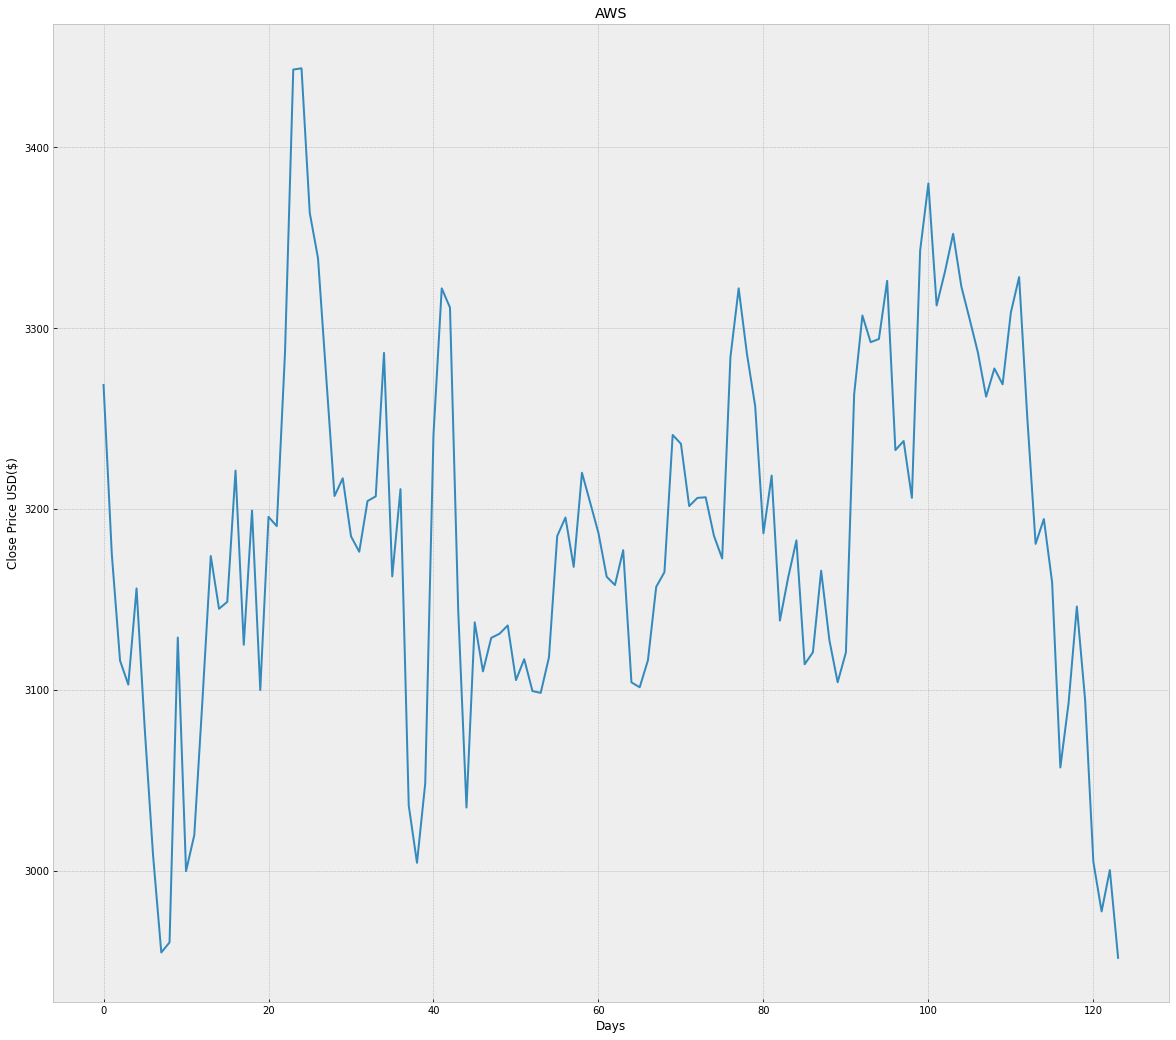

In [9]:
#Data show close price
plt.figure(figsize=(20,18))
plt.title('AWS')
plt.xlabel('Days')
plt.ylabel('Close Price USD($)')
plt.plot(df['Close'])
plt.show()


In [11]:
#Get the close price
df = df[['Close']]
df.head(4)

,Close
0,3268.610107
1,3175.110107
2,3116.219971
3,3102.969971


In [12]:
#Create a variable to predict 'x' days out into th future
future_days = 25
#Create a new column (taget shifted 'x' ) units/days up 
df['Prediction'] = df [['Close']].shift(-future_days)
df.tail(5)

,Close,Prediction
119,3094.530029,NaN
120,3005.000000,NaN
121,2977.570068,NaN
122,3000.459961,NaN
123,2951.949951,NaN


In [13]:
#Create the Feature data set (X) and convert it to a numpy array  and remove the last 'x' rows/days
X = np.array(df.drop(['Prediction'], 1))[:-future_days]
print(X)

[[3268.610107]
 [3175.110107]
 [3116.219971]
 [3102.969971]
 [3156.129883]
 [3078.100098]
 [3008.72998 ]
 [2954.909912]
 [2960.469971]
 [3128.98999 ]
 [2999.860107]
 [3019.790039]
 [3095.129883]
 [3174.050049]
 [3144.879883]
 [3148.72998 ]
 [3221.26001 ]
 [3125.      ]
 [3199.199951]
 [3099.959961]
 [3195.689941]
 [3190.550049]
 [3286.649902]
 [3442.929932]
 [3443.629883]
 [3363.709961]
 [3338.649902]
 [3272.709961]
 [3207.209961]
 [3217.01001 ]
 [3184.939941]
 [3176.399902]
 [3204.399902]
 [3207.040039]
 [3286.330078]
 [3162.780029]
 [3211.01001 ]
 [3036.149902]
 [3004.47998 ]
 [3048.409912]
 [3241.159912]
 [3322.      ]
 [3311.370117]
 [3143.73999 ]
 [3035.02002 ]
 [3137.389893]
 [3110.280029]
 [3128.810059]
 [3131.060059]
 [3135.659912]
 [3105.459961]
 [3117.02002 ]
 [3099.399902]
 [3098.389893]
 [3118.060059]
 [3185.070068]
 [3195.340088]
 [3168.040039]
 [3220.080078]
 [3203.530029]
 [3186.72998 ]
 [3162.580078]
 [3158.      ]
 [3177.290039]
 [3104.199951]
 [3101.48999 ]
 [3116.419

In [18]:
#Create the taget data set (y)adn convert it to a numpy array and get the of the target values except the last 'x' row/days
y = np.array(df['Prediction'])[:-future_days]
print(y) 

[3363.709961 3338.649902 3272.709961 3207.209961 3217.01001  3184.939941
 3176.399902 3204.399902 3207.040039 3286.330078 3162.780029 3211.01001
 3036.149902 3004.47998  3048.409912 3241.159912 3322.       3311.370117
 3143.73999  3035.02002  3137.389893 3110.280029 3128.810059 3131.060059
 3135.659912 3105.459961 3117.02002  3099.399902 3098.389893 3118.060059
 3185.070068 3195.340088 3168.040039 3220.080078 3203.530029 3186.72998
 3162.580078 3158.       3177.290039 3104.199951 3101.48999  3116.419922
 3156.969971 3165.120117 3240.959961 3236.080078 3201.649902 3206.179932
 3206.52002  3185.27002  3172.689941 3283.959961 3322.       3285.850098
 3256.929932 3186.629883 3218.51001  3138.379883 3162.159912 3182.699951
 3114.209961 3120.830078 3165.889893 3127.469971 3104.25     3120.76001
 3263.379883 3306.98999  3292.22998  3294.       3326.129883 3232.580078
 3237.620117 3206.199951 3342.879883 3380.       3312.530029 3331.
 3352.149902 3322.939941 3305.       3286.580078 3262.129883

In [17]:
#Split the data into 75% training and 25% testing
x_train, x_test, y_train, y_test =train_test_split(X, y, test_size = 0.25) 

In [19]:
#Create the models
#Create the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)
#Create the linear regression model
lr = LinearRegression().fit(x_train, y_train)

In [20]:
#Get the last 'x; rows of the feature data set
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[3185.27002 ],
       [3172.689941],
       [3283.959961],
       [3322.      ],
       [3285.850098],
       [3256.929932],
       [3186.629883],
       [3218.51001 ],
       [3138.379883],
       [3162.159912],
       [3182.699951],
       [3114.209961],
       [3120.830078],
       [3165.889893],
       [3127.469971],
       [3104.25    ],
       [3120.76001 ],
       [3263.379883],
       [3306.98999 ],
       [3292.22998 ],
       [3294.      ],
       [3326.129883],
       [3232.580078],
       [3237.620117],
       [3206.199951]])

In [21]:
#Show the model tree prediction
tree_prediction =  tree.predict(x_future)
print(tree_prediction)
print()
#show the model linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[3342.879883 3380.       3312.530029 3223.709961 3352.149902 3101.48999
 3305.       3286.580078 3236.080078 3120.830078 3185.070068 3272.709961
 3328.22998  3249.899902 3180.73999  3194.5      3328.22998  3099.399902
 3156.969971 3146.139893 3094.530029 3223.709961 3326.129883 3326.129883
 2951.949951]

[3191.67607872 3192.99571829 3181.32358801 3177.33322033 3181.12531425
 3184.15901502 3191.53343025 3188.1892321  3196.59481414 3194.10030936
 3191.94567677 3199.13021836 3198.43577373 3193.70903753 3197.73925461
 3200.17500978 3198.4431238  3183.48242065 3178.90775759 3180.45607006
 3180.27039647 3176.89999912 3186.71329395 3186.18459815 3189.48054679]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


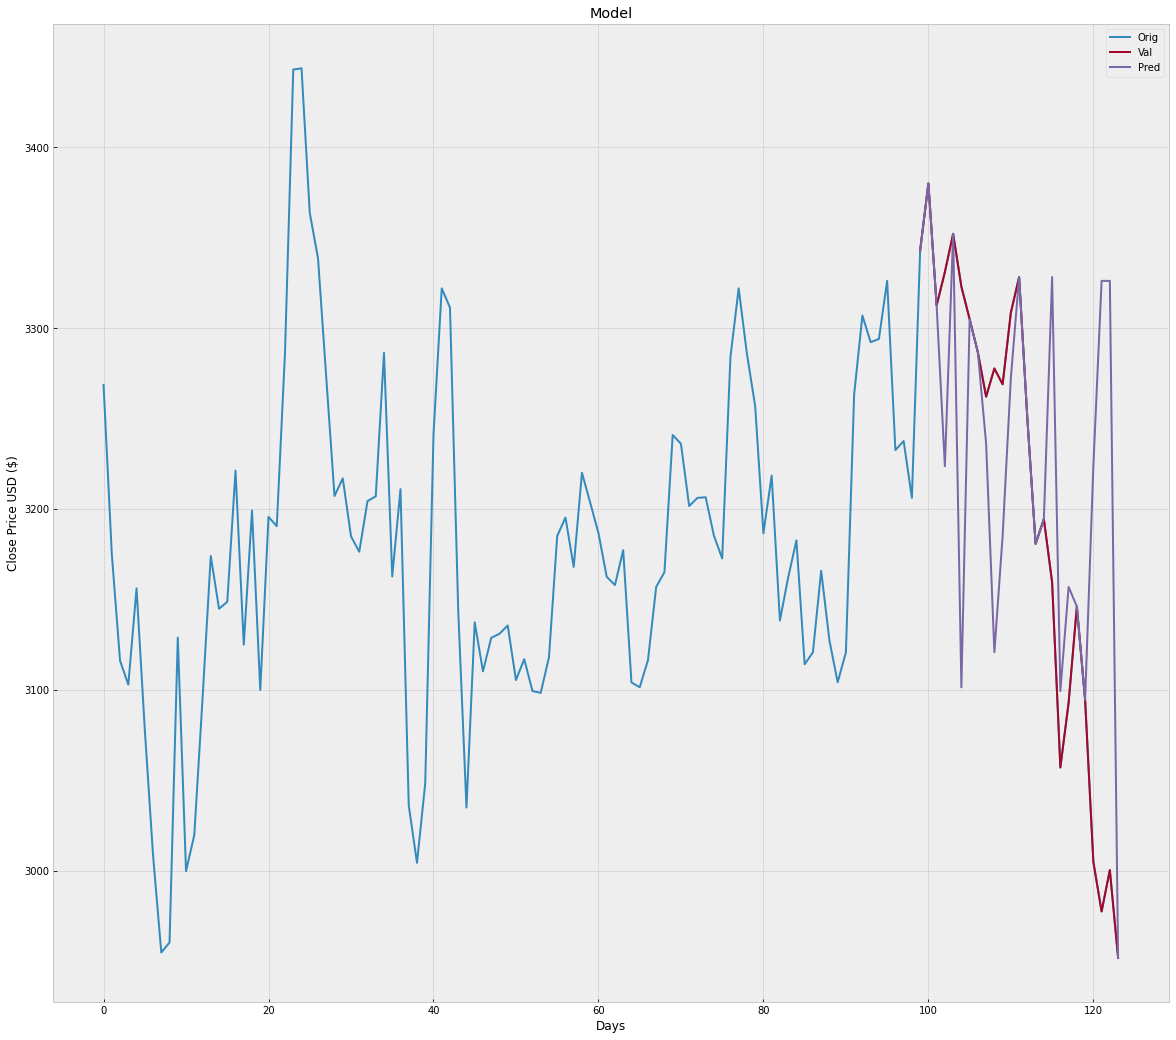

In [26]:
#show the data 
predictions = tree_prediction

vaild = df[X.shape[0]:]
vaild['Predictions'] = predictions
plt.figure(figsize=(20, 18))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.plot(vaild[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


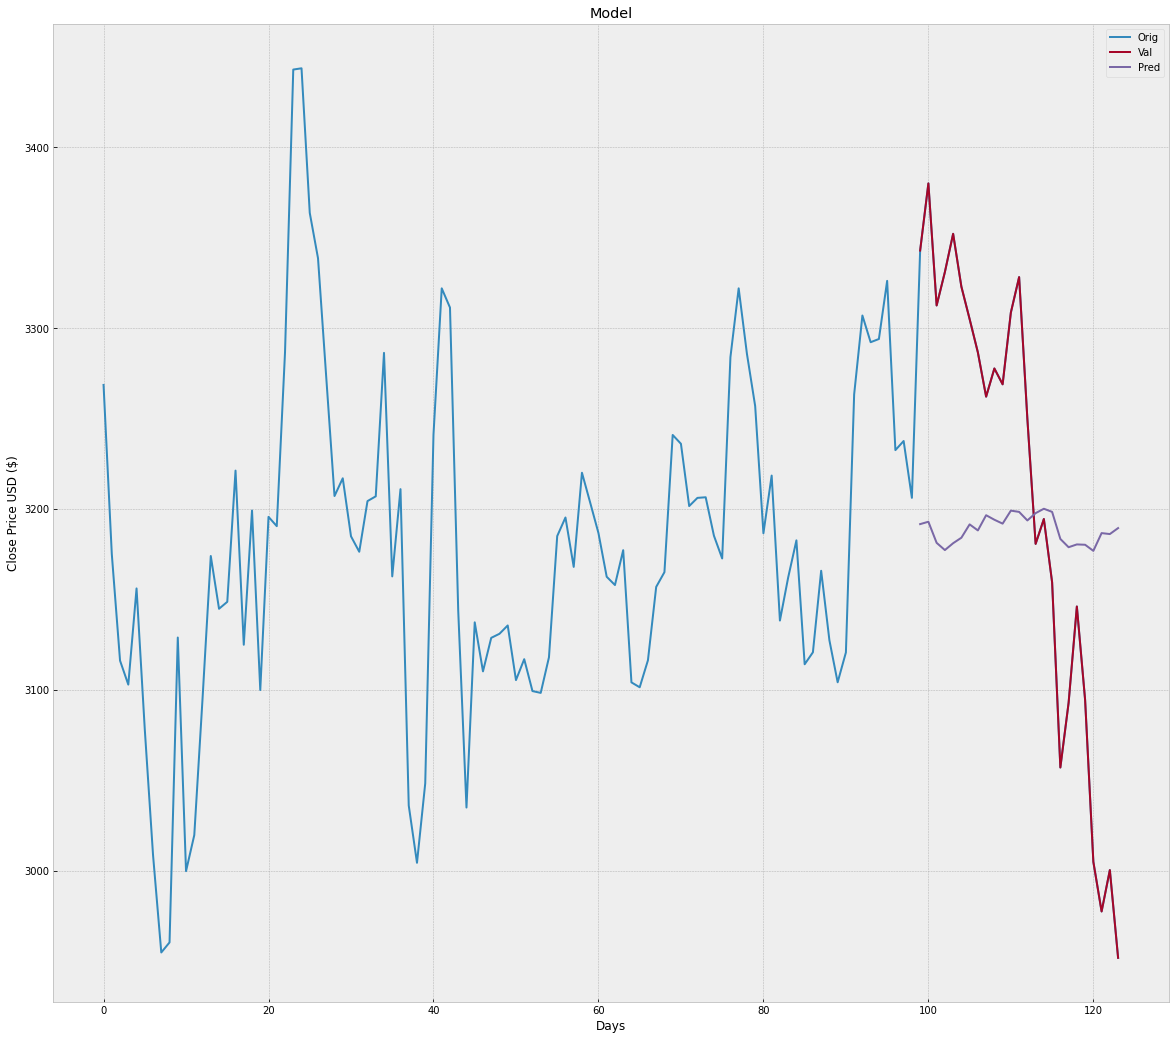

In [27]:
#show the data 
predictions = lr_prediction

vaild = df[X.shape[0]:]
vaild['Predictions'] = predictions
plt.figure(figsize=(20, 18))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.plot(vaild[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()
